In [ ]:
import csv

# We have to mount
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

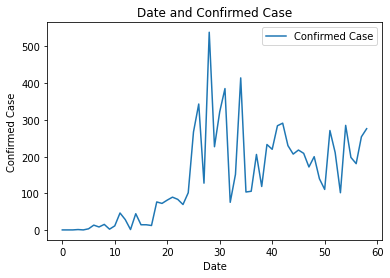

In [ ]:
import pandas as pd
import datetime
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
%matplotlib inline
from sklearn.linear_model import LinearRegression

df = pd.read_csv('drive/My Drive/Colab Notebooks/infection.csv',usecols=["Index","Confirmed Case"])
df.head()

df.shape
df.describe()

df.plot(x='Index', y='Confirmed Case')  
plt.title('Date and Confirmed Case')  
plt.xlabel('Date')  
plt.ylabel('Confirmed Case')  
plt.show()



[-1.84730493]
[[4.51902364]]


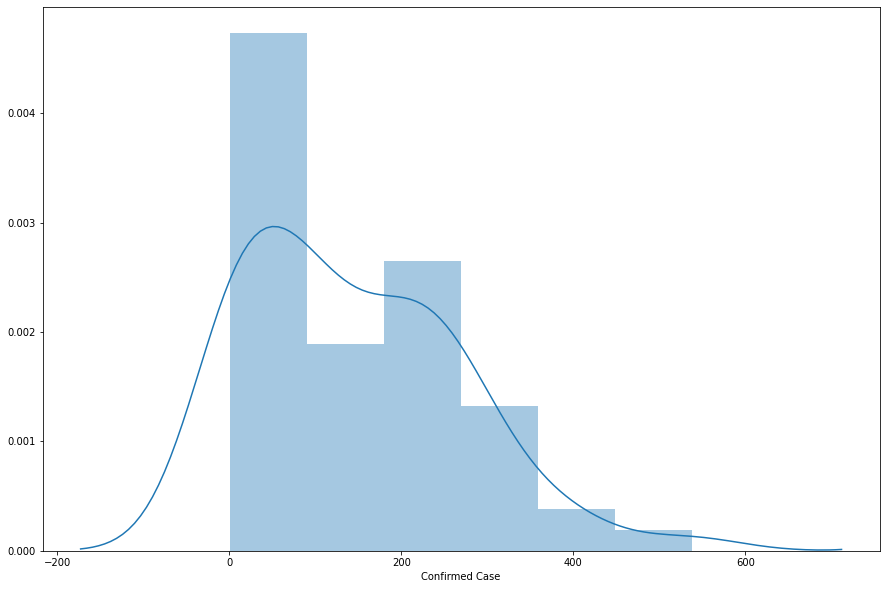

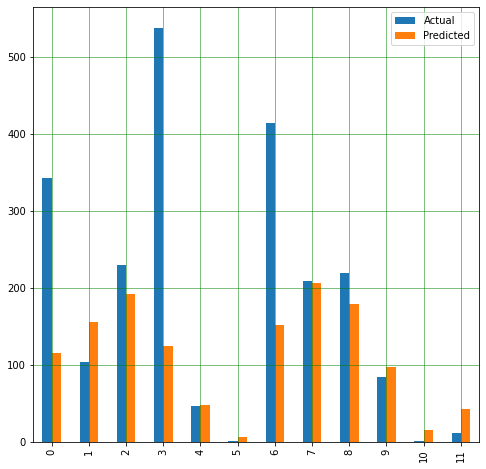

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Confirmed Case'])

X = df['Index'].values.reshape(-1,1)
y = df['Confirmed Case'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


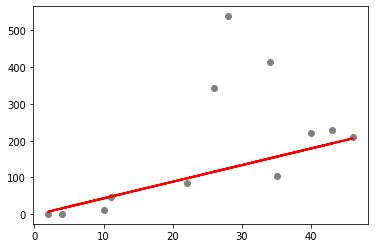

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 91.9974879936588
Mean Squared Error: 24878.956879607347
Root Mean Squared Error: 157.7306466087277


In [ ]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/infection.csv',usecols=["Index","Count of DateRecover","Confirmed Case"])
df.head()
x = df[["Index"]]
y = df['Confirmed Case']

index=list(range(0,89)) #representation of dates, 0= Jan 30,2020, 1=Feb 1,2020.......89=May 30,2020
predictions=y.to_list() #storing the previously recorded cases and added predictions 

sumOfCases=sum(predictions)
for i in range(60,89):
  regr = linear_model.LinearRegression()
  regr.fit(x, y)
  predictedCase = int(regr.predict([[i]]))
  predictions.append(predictedCase) 
  sumOfCases+=predictedCase

predict = pd.DataFrame (predictions,columns=['Predictions'])


# print('Metrics Accuracy Score:', metrics.accuracy_score(index,predict))  
# print('Mean Absolute Error:', metrics.mean_absolute_error(index, predict))  
# print('Mean Squared Error:', metrics.mean_squared_error(index, predict))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(index, predict)))

print("Sum of cases with prediction: ",sumOfCases)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(index,predictions)
plt.xlabel('Date Starting From Jan. 30 to May 30')  
plt.ylabel('Confirmed Case')  
plt.show()

NameError: ignored